In [148]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import DataFunctions_greg as fc


pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [149]:
# sns.scatterplot(data=df_testeroo,x="Elevation",y="Horizontal_Distance_To_Fire_Points",hue="Cover_Type",palette='Spectral')
# sns.scatterplot(data=df,y="Elevation",x="Horizontal_Distance_To_Fire_Points")
# sns.scatterplot(data=df,y="Vertical_Distance_To_Hydrology",x="Horizontal_Distance_To_Hydrology")

In [150]:
df = pd.read_csv("covtype.csv")
# df.info()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [151]:
df = fc.dummies_back_to_categorical(df,range(-41,-1),"Soil_Type")
df = fc.dummies_back_to_categorical(df,range(10,14),"Wilderness_Area")
df.head()

/Users/flatironschool/Flatiron DS/Forest_Tree_Types/DataFunctions_greg.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
0,2903,315,2,330,0,4734,214,237,161,4987,2,7,1
1,2906,45,1,371,6,4668,219,236,154,5007,2,7,1
2,2906,11,4,360,3,4696,216,232,153,4986,2,7,1
3,2906,0,3,330,3,4725,215,234,156,4966,2,7,1
4,2906,333,3,379,6,4658,212,235,161,4986,2,7,1


In [180]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,-0.269554,0.689848,-0.315590
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,0.017080,0.007149,0.138703
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,0.148285,-0.105571,0.286178
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,-0.020317,0.194685,0.056339
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,0.081664,0.071313,0.189085
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,-0.153450,0.240829,-0.445922
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,-0.035415,0.040877,-0.233455
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,-0.096426,0.013662,-0.080767
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,-0.048290,-0.001122,0.105050
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,-0.108936,0.100952,-0.416830


In [152]:
X = df.drop(columns='Cover_Type')
y = df['Cover_Type']

X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

# Run PCA 

In [153]:
pca=PCA()
pca_all = pca.fit_transform(X_scaled)
st.mean(sum(pca_all))

-1.164606505489029e-10

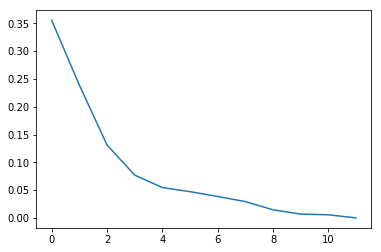

In [154]:
pca.explained_variance_ratio_
sns.lineplot(data=pca.explained_variance_ratio_)

In [167]:
for i in range(0,10):
    print(i, round(pca.explained_variance_ratio_[:i].sum(),3))
    if i>1:
        print("Change in pca:", round(pca.explained_variance_ratio_[:i].sum() - pca.explained_variance_ratio_[:(i-1)].sum(),3))
    
print(f"The first 10 eigenvectors explain {pca.explained_variance_ratio_[:4].sum()*100}% of the data.")

0 0.0
1 0.355
2 0.594
Change in pca: 0.239
3 0.725
Change in pca: 0.131
4 0.803
Change in pca: 0.077
5 0.857
Change in pca: 0.055
6 0.904
Change in pca: 0.047
7 0.943
Change in pca: 0.039
8 0.973
Change in pca: 0.029
9 0.987
Change in pca: 0.015
The first 10 eigenvectors explain 80.25509297610357% of the data.


In [168]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca_train = pca.fit_transform(X_train)
# st.mean(sum(pca_train))

# pca = PCA()
# pca_test = pca.fit_transform(X_test)
# st.mean(sum(pca_test))

In [169]:
display(pca_all)

array([[-2.79394478e-01, -4.62391617e-01, -6.08336910e-01, ...,
         9.25412977e-02, -8.10152462e-04,  7.40556380e-03],
       [-4.77938565e-01,  1.92160714e-01, -4.90380014e-01, ...,
         6.58854438e-02, -9.62295463e-03,  9.89054249e-03],
       [-4.97903262e-01,  2.74427618e-01, -4.77625148e-01, ...,
         5.76896726e-02, -2.27419521e-02,  5.44664858e-03],
       ...,
       [ 8.83175411e-01, -2.52759717e-01, -1.55042944e-01, ...,
         4.47534335e-02,  4.70324806e-03, -5.96773322e-03],
       [ 6.27603062e-01,  5.82992664e-01, -6.28072797e-03, ...,
         2.27194974e-02,  7.12677671e-05, -5.63233300e-03],
       [ 8.76682907e-01, -2.65946502e-01, -1.57499481e-01, ...,
         5.36120125e-02,  2.12618047e-02, -1.47642660e-03]])

In [170]:
pca_df = pd.DataFrame(pca_all[:, :4], index=df.index)
pca_df.head()

,0,1,2,3
0,-0.279394,-0.462392,-0.608337,0.340336
1,-0.477939,0.192161,-0.490380,0.442110
2,-0.497903,0.274428,-0.477625,0.450969
3,-0.506373,0.294922,-0.479233,0.455782
4,-0.261088,-0.504960,-0.605579,0.331198


In [171]:
df_new = df.join(pca_df)
df_new.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Soil_Type,Wilderness_Area,0,1,2,3
0,2903,315,2,330,0,4734,214,237,161,4987,2,7,1,-0.279394,-0.462392,-0.608337,0.340336
1,2906,45,1,371,6,4668,219,236,154,5007,2,7,1,-0.477939,0.192161,-0.490380,0.442110
2,2906,11,4,360,3,4696,216,232,153,4986,2,7,1,-0.497903,0.274428,-0.477625,0.450969
3,2906,0,3,330,3,4725,215,234,156,4966,2,7,1,-0.506373,0.294922,-0.479233,0.455782
4,2906,333,3,379,6,4658,212,235,161,4986,2,7,1,-0.261088,-0.504960,-0.605579,0.331198


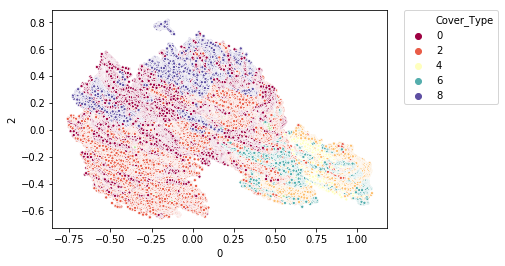

In [172]:
sns.scatterplot(data=df_new, x=0,y=2,hue="Cover_Type",palette='Spectral',s=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [173]:
vects = pca.components_[:4]

In [179]:
one = pd.Series(vects[3], index=df.drop(columns="Cover_Type").columns)
one.sort_values(ascending=False)

Horizontal_Distance_To_Roadways       0.772740
Wilderness_Area                       0.371469
Horizontal_Distance_To_Fire_Points    0.359686
Horizontal_Distance_To_Hydrology      0.200733
Hillshade_3pm                         0.096643
Hillshade_Noon                        0.065109
Vertical_Distance_To_Hydrology        0.055947
Elevation                             0.037452
Hillshade_9am                        -0.013385
Slope                                -0.069091
Aspect                               -0.138256
Soil_Type                            -0.230298
dtype: float64